In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [19]:
wine = load_wine()

In [20]:
X = wine.data
y = wine.target

In [21]:
X.shape

(178, 13)

In [22]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295.0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045.0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045.0


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

In [24]:
X_train.shape

(124, 13)

In [25]:
X_test.shape

(54, 13)

In [26]:
dtc = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=0)
dtc.fit(X_train, y_train)
rfc.fit(X_train, y_train)

/anaconda3/envs/ys/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [27]:
score_t = dtc.score(X_test, y_test)
score_r = rfc.score(X_test, y_test)
print('Tree:', score_t)
print('Random:', score_r)

Tree: 0.7777777777777778
Random: 0.9814814814814815


In [28]:
from sklearn.model_selection import cross_val_score
rfc = RandomForestClassifier(n_estimators=25)
rfc_s = cross_val_score(rfc, X, y, cv=10)

In [29]:
dtc = DecisionTreeClassifier()
dtc_s = cross_val_score(dtc, X, y, cv=10)

In [30]:
rfc_s

array([0.94736842, 1.        , 1.        , 0.94444444, 1.        ,
       1.        , 1.        , 0.94444444, 1.        , 1.        ])

In [31]:
dtc_s

array([0.89473684, 0.83333333, 0.72222222, 0.88888889, 0.83333333,
       0.88888889, 1.        , 0.94444444, 0.94117647, 1.        ])

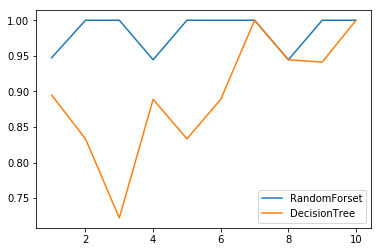

In [32]:
plt.plot(range(1,11), rfc_s, label='RandomForset')
plt.plot(range(1,11), dtc_s, label='DecisionTree')
plt.legend()

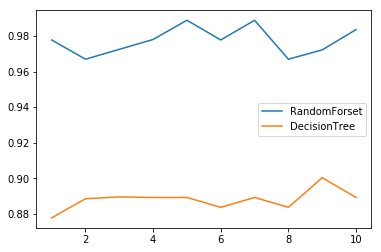

In [33]:
dtc_l = []
rfc_l = []

for i in range(10):
    rfc = RandomForestClassifier(n_estimators=25)
    rfc_s = cross_val_score(rfc, X, y, cv=10).mean()
    rfc_l.append(rfc_s)
    
    dtc = DecisionTreeClassifier()
    dtc_s = cross_val_score(dtc, X, y, cv=10).mean()
    dtc_l.append(dtc_s)
    
plt.plot(range(1,11), rfc_l, label='RandomForset')
plt.plot(range(1,11), dtc_l, label='DecisionTree')
plt.legend()

0.9888888888888889 23


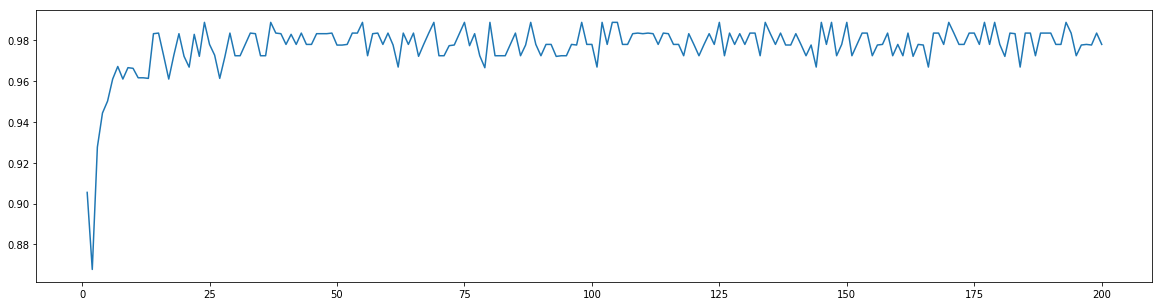

In [34]:
superpa = []

for i in range(200):
    rfc = RandomForestClassifier(n_estimators=i+1)
    rfc_s = cross_val_score(rfc, X, y, cv=10).mean()
    superpa.append(rfc_s)
    
print(max(superpa), superpa.index(max(superpa)))
plt.figure(figsize=(20,5))
plt.plot(range(1,201), superpa)

In [35]:
# 25颗数判断错误的可能性
from scipy.special import comb
np.array([comb(25,i)*(.2**i)*((1-.2)**(25-i)) for i in range(13, 26)]).sum()

0.00036904803455582827

In [36]:
rfc = RandomForestClassifier(n_estimators=20, random_state=2)
rfc = rfc.fit(X_train, y_train)

In [37]:
rfc.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=1872583848, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=794921487, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_wei

In [38]:
rfc = RandomForestClassifier(n_estimators=20, oob_score=True)
rfc = rfc.fit(X, y)

In [39]:
rfc.oob_score_

0.9662921348314607

In [40]:
rfc = RandomForestClassifier(n_estimators=25)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.9629629629629629

In [41]:
rfc.feature_importances_

array([0.13429596, 0.01800308, 0.0190358 , 0.05192455, 0.01377455,
       0.03131392, 0.15027388, 0.01841404, 0.01573053, 0.18760912,
       0.05288283, 0.14755731, 0.15918443])

In [42]:
rfc.apply(X_test)

array([[ 5,  2,  1, ...,  9,  7,  1],
       [ 5, 15,  3, ..., 13,  4,  4],
       [ 8, 13,  5, ..., 13, 19, 15],
       ...,
       [ 5, 17,  1, ...,  9, 13,  1],
       [ 5,  2,  1, ...,  9, 13,  1],
       [ 5, 17,  1, ...,  9, 13,  1]])

In [43]:
rfc.predict(X_test)

array([1, 2, 0, 1, 1, 1, 2, 1, 1, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 0, 2, 1, 2, 2, 1, 0, 0, 1, 0, 2, 0, 1, 0, 2, 1, 0, 1, 0, 2,
       1, 2, 0, 1, 1, 2, 1, 1, 1, 1])

In [44]:
rfc.predict_proba(X_test)

array([[0.  , 0.96, 0.04],
       [0.04, 0.24, 0.72],
       [1.  , 0.  , 0.  ],
       [0.  , 0.84, 0.16],
       [0.24, 0.6 , 0.16],
       [0.  , 1.  , 0.  ],
       [0.04, 0.12, 0.84],
       [0.16, 0.84, 0.  ],
       [0.12, 0.88, 0.  ],
       [0.12, 0.12, 0.76],
       [0.88, 0.12, 0.  ],
       [0.08, 0.08, 0.84],
       [1.  , 0.  , 0.  ],
       [0.08, 0.92, 0.  ],
       [0.  , 0.88, 0.12],
       [0.32, 0.64, 0.04],
       [0.  , 1.  , 0.  ],
       [0.08, 0.92, 0.  ],
       [0.12, 0.88, 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.92, 0.08],
       [0.04, 0.28, 0.68],
       [0.  , 0.04, 0.96],
       [0.04, 0.36, 0.6 ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.04, 0.96],
       [0.  , 0.92, 0.08],
       [0.04, 0.  , 0.96],
       [0.04, 0.2 , 0.76],
       [0.  , 1.  , 0.  ],
       [0.96, 0.  , 0.04],
       [0.92, 0.08, 0.  ],
       [0.4 , 0.6 , 0.  ],
       [0.96, 0.04, 0.  ],
       [0.04, 0.  , 0.96],
       [0.96, 0.  , 0.04],
       [0.16, 0.68, 0.16],
 

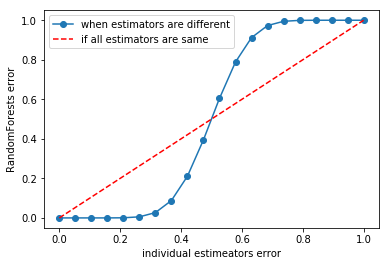

In [45]:
x = np.linspace(0, 1, 20)

y = []

for epsilon in x:
    E = np.array([comb(25, i)*epsilon**i*((1-epsilon)**(25-i)) for i in range(13, 26)]).sum()
    y.append(E)
    
plt.plot(x, y, 'o-', label='when estimators are different')
plt.plot(x, x, '--', color='red', label='if all estimators are same')
plt.xlabel('individual estimeators error')
plt.ylabel('RandomForests error')
plt.legend()

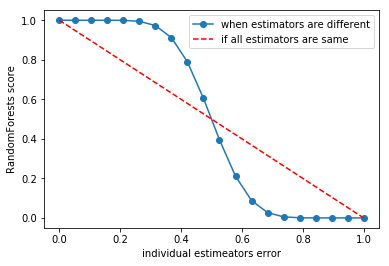

In [46]:
x = np.linspace(0, 1, 20)
score = []

for epsilon in x:
    E = np.array([comb(25, i)*epsilon**i*((1-epsilon)**(25-i)) for i in range(13, 26)]).sum()
    score.append(1-E)
    
plt.plot(x, score, 'o-', label='when estimators are different')
plt.plot(x, 1-x, '--', color='red', label='if all estimators are same')
plt.xlabel('individual estimeators error')
plt.ylabel('RandomForests score')
plt.legend()

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston

In [48]:
boston = load_boston()

In [49]:
rfr = RandomForestRegressor(n_estimators=100, random_state=0)
cross_val_score(rfr, boston.data, boston.target, cv=10, 
                scoring='neg_mean_squared_error')

array([-10.72900447,  -5.36049859,  -4.74614178, -20.84946337,
       -12.23497347, -17.99274635,  -6.8952756 , -93.78884428,
       -29.80411702, -15.25776814])

In [50]:
# 查看可用的评估指标
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

In [51]:
# 使用随机森林回归填补缺失值
from sklearn.impute import SimpleImputer

In [52]:
data = load_boston()
data.data.shape

(506, 13)

In [53]:
x_full, y_full = data.data, data.target
n_samples = x_full.shape[0]
n_features = x_full.shape[1]

In [54]:
rng = np.random.RandomState(0)
missing_rate = .5
n_missing_samples = int(np.floor(n_samples*n_features*missing_rate))

missing_features = rng.randint(0, n_features, n_missing_samples)
missing_samples = rng.randint(0, n_samples, n_missing_samples)

x_missing = x_full.copy()
y_missing = y_full.copy()

x_missing[missing_samples, missing_features] = np.nan
x_missing = pd.DataFrame(x_missing)

In [55]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
x_missing_mean = imp_mean.fit_transform(x_missing)

In [56]:
imp_0 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)
x_missing_0 = imp_0.fit_transform(x_missing)

In [57]:
x_missing_rfr = x_missing.copy()
sortindex = np.argsort(x_missing_rfr.isnull().sum(axis=0)).values

for i in sortindex:
    df = x_missing_rfr
    fillc = df.iloc[:, i]
    df = pd.concat([df.iloc[:, df.columns != i], pd.DataFrame(y_full)], axis=1)
    df_0 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0).fit_transform(df)
    
    y_train = fillc[fillc.notnull()]
    y_test = fillc[fillc.isnull()]
    X_train = df_0[y_train.index,:]
    X_test = df_0[y_test.index,:]
    
    rfr = RandomForestRegressor(n_estimators=100)
    rfr.fit(X_train, y_train)
    ypredict = rfr.predict(X_test)
    
    x_missing_rfr.loc[x_missing_rfr.iloc[:, i].isnull(), i] = ypredict

In [58]:
x = [x_full, x_missing_mean, x_missing_0, x_missing_rfr]

mse = []
std = []
for i in x:
    estimator = RandomForestRegressor(random_state=0, n_estimators=100)
    score = cross_val_score(estimator, i, y_full, scoring='neg_mean_squared_error', cv=5).mean()
    mse.append(score * -1)

[Text(0, 0, 'Full Data'),
 Text(0, 0, 'Mean Imputer'),
 Text(0, 0, 'Zero Imputer'),
 Text(0, 0, 'Regressor Imputer')]

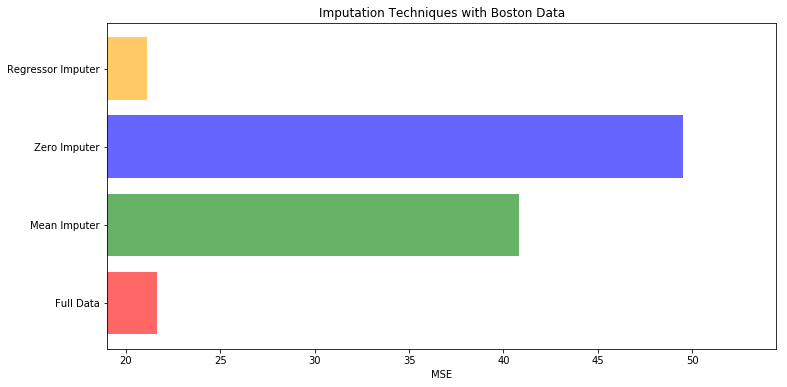

In [59]:
x_labels = ['Full Data', 'Mean Imputer', 
            'Zero Imputer', 'Regressor Imputer']
colors = ['r', 'g', 'b', 'orange']
plt.figure(figsize=(12, 6))
ax = plt.subplot(111)
for i in np.arange(len(mse)):
    ax.barh(i, mse[i], color=colors[i], alpha=.6, align='center')
    
ax.set_title('Imputation Techniques with Boston Data')
ax.set_xlim(left=np.min(mse) *.9, right=np.max(mse) * 1.1)
ax.set_yticks(np.arange(len(mse)))
ax.set_xlabel('MSE')
ax.set_yticklabels(x_labels)

In [60]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles

In [61]:
x1, y1 = make_gaussian_quantiles(cov=2, n_samples=500, n_features=2,
                                 n_classes=2, random_state=1)
x2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5, n_samples=400, 
                                 n_features=2, n_classes=2, random_state=1)

x = np.concatenate((x1, x2))
y = np.concatenate((y1, -y2+1))

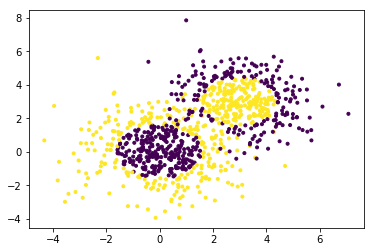

In [62]:
plt.scatter(x[:, 0], x[:, 1], marker='.', c=y)

In [63]:
dbc = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, 
                                                min_samples_split=20, 
                                                min_samples_leaf=5), algorithm='SAMME', 
                         n_estimators=200, learning_rate=.8)
dbc.fit(x, y)

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.8, n_estimators=200, random_state=None)

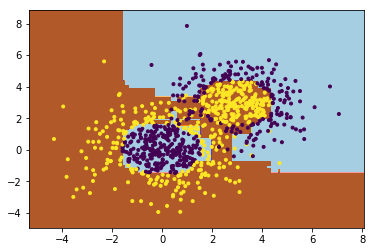

In [64]:
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), 
                     np.arange(y_min, y_max, .02))

z = dbc.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

cs = plt.contourf(xx, yy, z, cmap=plt.cm.Paired)
plt.scatter(x[:, 0], x[:, 1], marker='.', c=y)

In [65]:
print('score:', dbc.score(x, y))

score: 0.9133333333333333


In [66]:
dbc = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, 
                                                min_samples_split=20, 
                                                min_samples_leaf=5), algorithm='SAMME', 
                         n_estimators=300, learning_rate=.8)
dbc.fit(x, y)
print('score:', dbc.score(x, y))

score: 0.9622222222222222


In [67]:
dbc = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, 
                                                min_samples_split=20, 
                                                min_samples_leaf=5), algorithm='SAMME', 
                         n_estimators=300, learning_rate=.5)
dbc.fit(x, y)
print('score:', dbc.score(x, y))

score: 0.8944444444444445


In [69]:
dbc = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, 
                                                min_samples_split=20, 
                                                min_samples_leaf=5), algorithm='SAMME', 
                         n_estimators=700, learning_rate=.7)
dbc.fit(x, y)
print('score:', dbc.score(x, y))

score: 0.9688888888888889


In [70]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

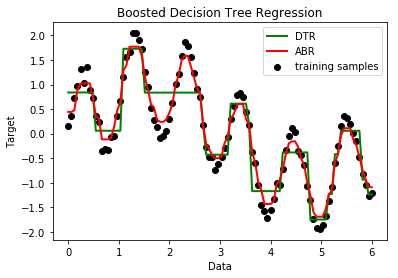

In [75]:
rng = np.random.RandomState(1)
x = np.linspace(0, 6, 100).reshape(-1, 1) 
y = np.sin(x).ravel() + np.sin(6 * x).ravel() + \
    rng.normal(0, .1, x.shape[0]) # (rng.normal(0, .1, x.shape[0])加入的噪声

reg_1 = DecisionTreeRegressor(max_depth=4)
reg_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), 
                          n_estimators=300, random_state=rng)

reg_1.fit(x, y)
reg_2.fit(x, y)

y_1 = reg_1.predict(x)
y_2 = reg_2.predict(x)

plt.figure()
plt.scatter(x, y, c='k', label="training samples")
plt.plot(x, y_1, c='g', label='DTR', linewidth=2)
plt.plot(x, y_2, c='r', label='ABR', linewidth=2)
plt.xlabel('Data')
plt.ylabel('Target')
plt.title('Boosted Decision Tree Regression')
plt.legend()

In [76]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

In [77]:
cancer = load_breast_cancer()

In [78]:
rfc = RandomForestClassifier(n_estimators=100, random_state=90)
score_pre = cross_val_score(rfc, cancer.data, cancer.target, cv=10).mean()
score_pre

0.9666925935528475

最高score: 0.9684480598046841
最优n_estimators: 41


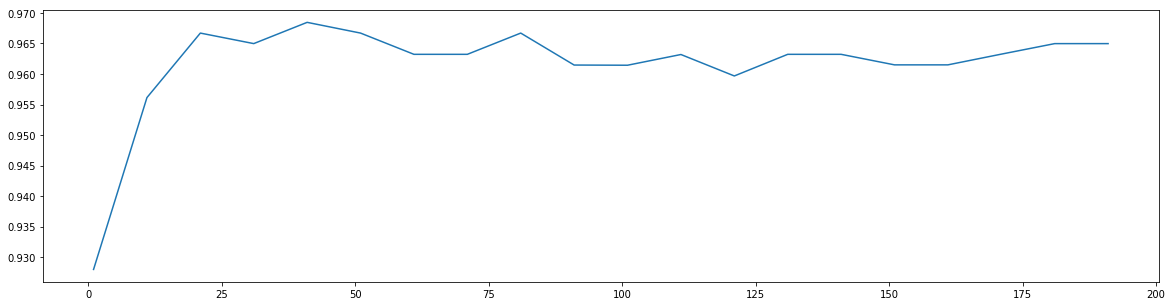

In [79]:
scorel = []
for i in range(0, 200, 10):
    rfc = RandomForestClassifier(n_estimators=i+1, random_state=90)
    score = cross_val_score(rfc, cancer.data, cancer.target, cv=10). mean()
    scorel.append(score)
    
print('最高score:', max(scorel))
print('最优n_estimators:', (scorel.index(max(scorel))*10)+1)
plt.figure(figsize=(20, 5))
plt.plot(range(1, 201, 10), scorel)

0.9719568317345088 39


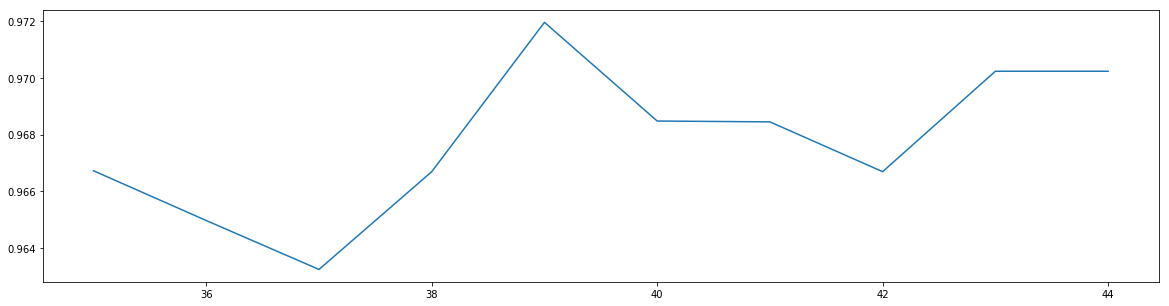

In [80]:
scorel = []
for i in range(35, 45):
    rfc = RandomForestClassifier(n_estimators=i, random_state=90)
    score = cross_val_score(rfc, cancer.data, cancer.target, cv=10). mean()
    scorel.append(score)
    
print(max(scorel),([*range(35,45)][scorel.index(max(scorel))]))
plt.figure(figsize=[20,5])
plt.plot(range(35,45),scorel)

In [82]:
param_grid = {'max_depth':np.arange(1, 20, 1)}

rfc = RandomForestClassifier(n_estimators=39,random_state=90)
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(cancer.data,cancer.target)
GS.best_score_

/anaconda3/envs/ys/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.9718804920913884

In [83]:
GS.best_params_

{'max_depth': 11}

In [84]:
param_grid = {'max_features':np.arange(5,30,1)}

rfc = RandomForestClassifier(n_estimators=39,random_state=90)
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(cancer.data,cancer.target)
GS.best_score_

/anaconda3/envs/ys/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.9718804920913884

In [85]:
GS.best_params_

{'max_features': 5}

In [88]:
param_grid={'min_samples_leaf':np.arange(1, 1+10, 1)}

rfc = RandomForestClassifier(n_estimators=39,random_state=90)
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(cancer.data,cancer.target)
GS.best_score_

/anaconda3/envs/ys/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.9718804920913884

In [87]:
GS.best_params_

{'min_samples_leaf': 1}

In [89]:
param_grid={'min_samples_split':np.arange(2, 2+20, 1)}

rfc = RandomForestClassifier(n_estimators=39,random_state=90)
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(cancer.data, cancer.target)
GS.best_score_

/anaconda3/envs/ys/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.9718804920913884

In [90]:
GS.best_params_

{'min_samples_split': 2}

In [91]:
param_grid = {'criterion':['gini', 'entropy']}

rfc = RandomForestClassifier(n_estimators=39,random_state=90)
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(cancer.data,cancer.target)
GS.best_score_

0.9718804920913884

In [92]:
GS.best_params_

{'criterion': 'gini'}